In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_master = pd.read_parquet('/kaggle/input/commodity/cleaned_commodity_prices.parquet')

In [ ]:
# Dropping outlier
# df_master.drop(index=69409345, inplace=True)

### Which 3 commodities had the highest average price in 2024?

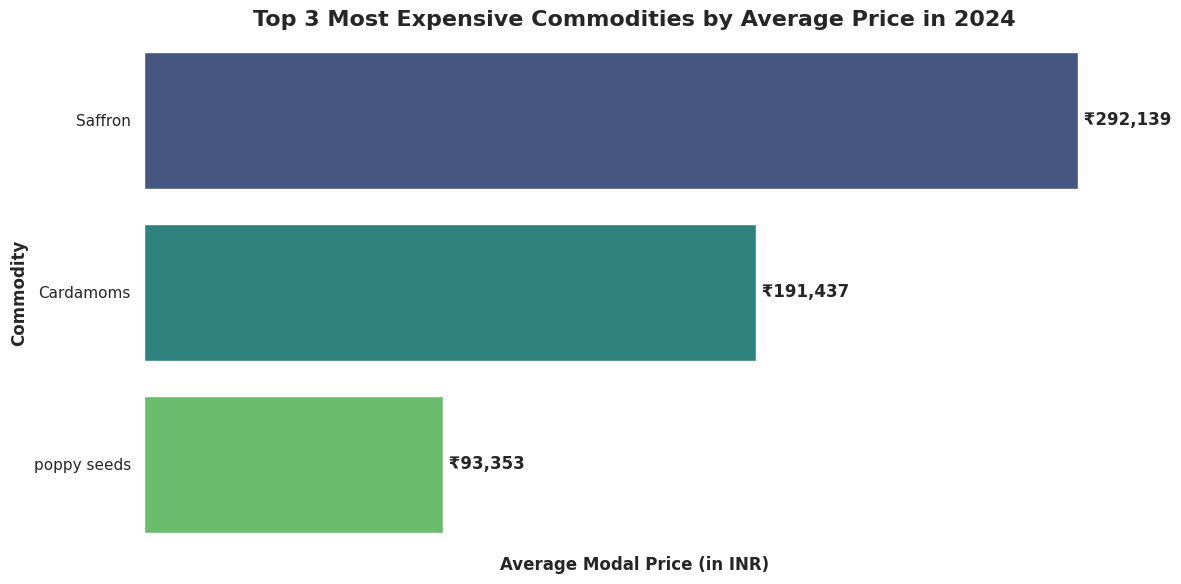

In [22]:
df_top_3_priced_2024 = df_master[df_master['Year'] == 2024].copy() \
    .groupby('Commodity')['Modal_Price'] \
    .mean() \
    .sort_values(ascending=False) \
    .reset_index() \
    .head(3)

# Set a professional visual style for the plot.
sns.set_theme(style="whitegrid")

# Create a figure and axes for the plot.
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Modal_Price', 
    y='Commodity', 
    data=df_top_3_priced_2024, 
    palette="viridis",
    hue='Commodity',
    legend=False
)

# The rest of the annotation and styling code remains exactly the same
# Add data labels (annotations) to the end of each bar for clarity.
for bar in ax.patches:
    label_text = f' ₹{bar.get_width():,.0f}'
    ax.text(bar.get_width(),
            bar.get_y() + bar.get_height() / 2,
            label_text,
            va='center',
            ha='left',
            fontweight='bold',
            size=12)

# Customize the plot's title and labels.
ax.set_title('Top 3 Most Expensive Commodities by Average Price in 2024', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Modal Price (in INR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Commodity', fontsize=12, fontweight='bold')

# Remove unnecessary x-axis ticks and the plot frame.
ax.set_xticks([])
sns.despine(left=True, bottom=True)

# Ensure the plot layout is tight and clean.
plt.tight_layout()

# Display the plot.
plt.show()

### How did rice and wheat prices change from 2020 to 2024?

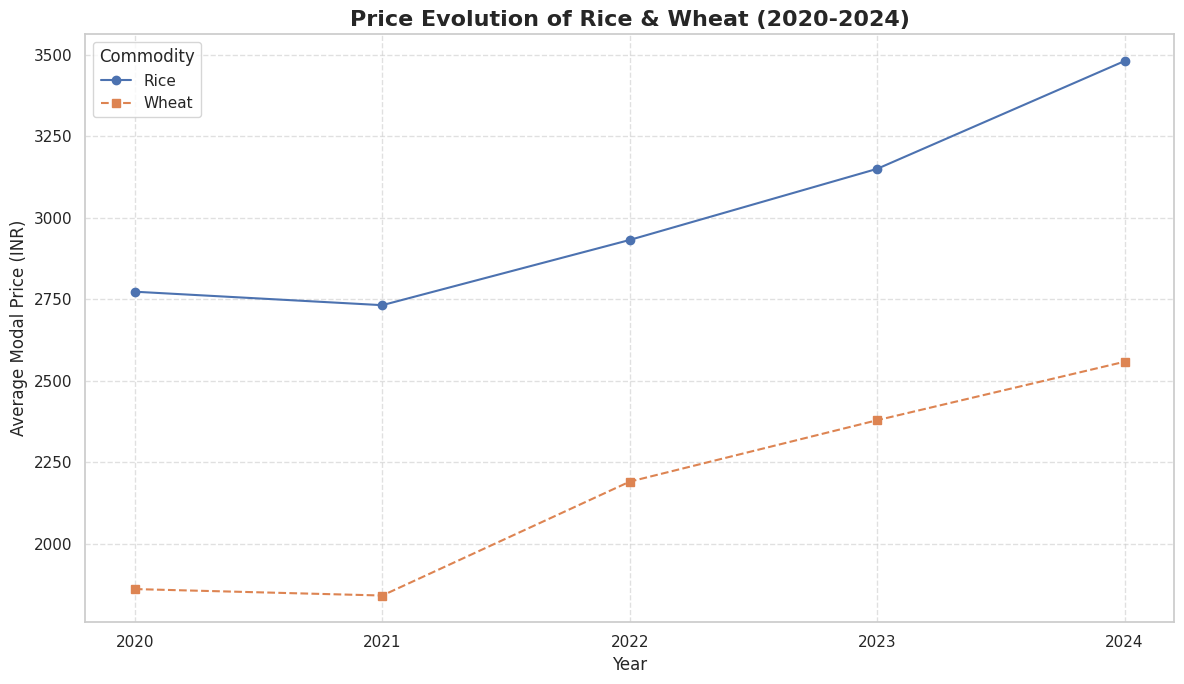

In [23]:
# Create the aggregated data, getting one average price per commodity, per year.
yearly_avg_prices = df_master[
    (df_master['Commodity'].isin(['Rice', 'Wheat'])) &
    (df_master['Year'].between(2020, 2024))
].groupby(['Commodity', 'Year'])['Modal_Price'].mean().reset_index()

# Create two separate DataFrames for easier plotting.
df_rice = yearly_avg_prices[yearly_avg_prices['Commodity'] == 'Rice']
df_wheat = yearly_avg_prices[yearly_avg_prices['Commodity'] == 'Wheat']

# Create a figure and an axes object to draw on.
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the first line for Rice.
ax.plot(df_rice['Year'], df_rice['Modal_Price'], 
        marker='o',         # Use circles for data points
        linestyle='-',      # Use a solid line
        label='Rice')       # Add a label for the legend

# Plot the second line for Wheat on the same axes.
ax.plot(df_wheat['Year'], df_wheat['Modal_Price'], 
        marker='s',         # Use squares for data points
        linestyle='--',    # Use a dashed line
        label='Wheat')      # Add a label for the legend

# Add a title and labels.
ax.set_title('Price Evolution of Rice & Wheat (2020-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Modal Price (INR)', fontsize=12)

# Add a legend.
ax.legend(title='Commodity', fontsize=11)

# Add a grid for readability.
ax.grid(True, linestyle='--', alpha=0.6)


# Ensure the x-axis shows whole numbers for the years.
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Ensure the plot layout is tight and clean.
plt.tight_layout()

# Display the final plot.
plt.show()

### Which month has the highest onion price (all years)?

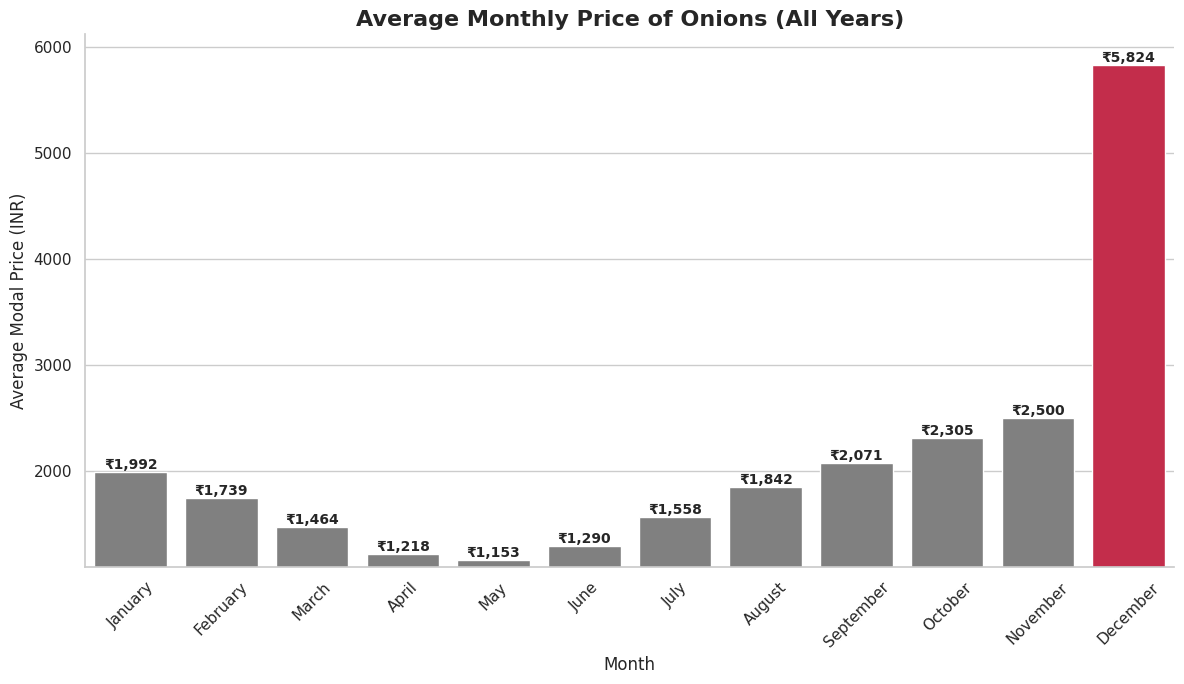

In [24]:
# Group by both month number and month name to get the average price, then sort chronologically.
avg_onion_price_by_month = df_master[df_master['Commodity'] == 'Onion'].copy() \
    .groupby(['Month', 'Month_Name'])['Modal_Price'] \
    .mean() \
    .reset_index()

avg_onion_price_by_month.sort_values(by='Month', inplace=True)


# Set a professional visual style.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Find the month with the highest price to highlight it.
highest_price_month = avg_onion_price_by_month.loc[avg_onion_price_by_month['Modal_Price'].idxmax()]

# Create a custom color palette to highlight the peak month.
palette = {month: "crimson" if month == highest_price_month['Month_Name'] else "gray" for month in avg_onion_price_by_month['Month_Name']}

# Create the bar plot.
ax = sns.barplot(
    x='Month_Name', 
    y='Modal_Price', 
    data=avg_onion_price_by_month,
    palette=palette,
    hue='Month_Name',
    legend=False
)


# Add the exact price value on top of each bar.
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'₹{bar.get_height():,.0f}', # Keep currency here as it's just text
        ha='center',
        va='bottom',
        size=10,
        fontweight='bold'
    )

# Customize the plot's title and labels.
ax.set_title('Average Monthly Price of Onions (All Years)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Modal Price (INR)', fontsize=12)

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45)


# Set the y-axis to start closer to the minimum value to better emphasize the differences.
ax.set_ylim(bottom=avg_onion_price_by_month['Modal_Price'].min() * 0.95)

# Remove the top and right spines for a cleaner look.
sns.despine()

# Ensure the plot layout is tight and clean.
plt.tight_layout()

# Display the plot.
plt.show()

### Top 5 districts in Maharashtra with highest tomato price (2023–2024)

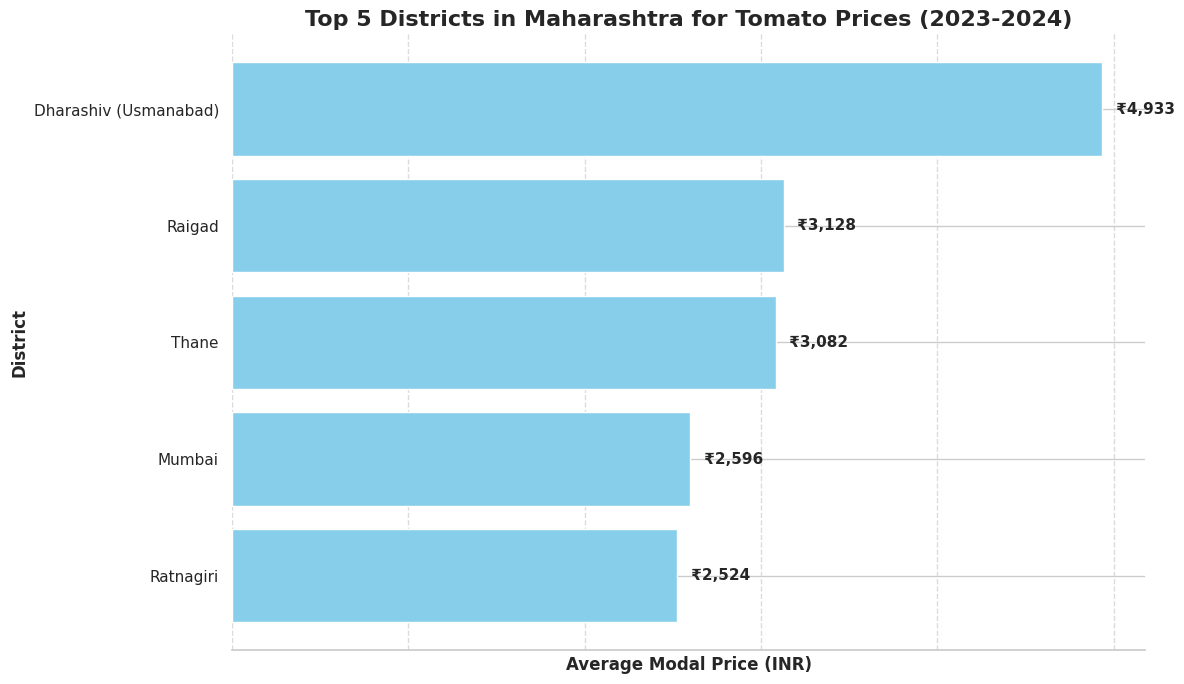

In [25]:
df_top_5_districts = df_master[
    (df_master['Commodity'] == 'Tomato') &
    (df_master['Year'].between(2023, 2024)) &
    (df_master['State'] == 'Maharashtra')
].copy().groupby('District')['Modal_Price'].mean().sort_values(ascending=False).reset_index().head(5)

# Because we want a horizontal bar chart with the highest value at the top,
# we need to reverse the order of our data before plotting.
df_top_5_districts_sorted = df_top_5_districts.sort_values(by='Modal_Price', ascending=True)

# Create a figure and an axes object. This is our canvas.
fig, ax = plt.subplots(figsize=(12, 7))

# Create the horizontal bar chart.
# ax.barh() is the function for horizontal bars.
bars = ax.barh(
    df_top_5_districts_sorted['District'],      # Y-axis: The district names
    df_top_5_districts_sorted['Modal_Price'],   # X-axis: The length of the bars (price)
    color='skyblue'                             # Set a color for the bars
)


# Add data labels to the end of each bar.
for bar in bars:
    width = bar.get_width()
    label_text = f' ₹{width:,.0f}'
    ax.text(width + 50, # Position the text slightly to the right of the bar
            bar.get_y() + bar.get_height() / 2, # Center the text vertically on the bar
            label_text,
            va='center',
            ha='left',
            fontweight='bold',
            size=11)

# Add a title and labels.
ax.set_title('Top 5 Districts in Maharashtra for Tomato Prices (2023-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Modal Price (INR)', fontsize=12, fontweight='bold')
ax.set_ylabel('District', fontsize=12, fontweight='bold')

# Add a grid for the x-axis to make reading the values easier.
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Remove the x-axis labels as we have annotated the bars directly.
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove the top, right, and left spines (borders) for a cleaner, more modern look.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure the plot layout is tight and clean.
plt.tight_layout()

# Display the final plot.
plt.show()

### How does potato price differ by grade (FAQ vs Medium)?

In [ ]:
df_potato_grades = df_master[
    (df_master['Grade'].isin(['FAQ', 'Medium'])) & 
    (df_master['Commodity'] == 'Potato')
].copy()

# Create a pivot table to get the average price for each grade.
grade_comparison = df_potato_grades.pivot_table(
    index='Commodity',
    columns='Grade',
    values='Modal_Price',
    aggfunc='mean'
)


# Get the grade names (our x-axis labels)
grades = grade_comparison.columns

# Get the price values (the height of our bars)
# .iloc[0] selects the first (and only) row of our pivot table.
prices = grade_comparison.iloc[0]

# Create the plot
plt.figure(figsize=(6, 5))
plt.bar(grades, prices, color=['skyblue', 'gray'])

plt.title('Average Potato Price: FAQ vs. Medium Grade', fontsize=14)
plt.ylabel('Average Modal Price (INR)', fontsize=12)
plt.xlabel('Grade', fontsize=12)

# Add a simple grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# We can print the final calculation separately for clarity.
price_difference = grade_comparison['Medium'].iloc[0] - grade_comparison['FAQ'].iloc[0]
print(f"\nAnalysis complete.")
print(f"The calculated price premium for 'FAQ' grade potatoes is: ₹{price_difference:,.2f}")